In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/ds_beforeduplication.csv')
df

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,"Alex, a teenager living in near-future Englan..."
1,6,A Wizard of Earthsea,Children's literature,"Ged is a young boy on Gont, one of the larger..."
2,8,Blade Runner 3: Replicant Night,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
3,9,Blade Runner 2: The Edge of Human,Science Fiction,Beginning several months after the events in ...
4,21,Children of Dune,Science Fiction,Nine years after Emperor Paul Muad'dib walked...
...,...,...,...,...
8794,16541,Nevermore: The Final Maximum Ride Adventure,Young adult literature,The prologue is Angel's vision of Max's death...
8795,16542,The Bourne Imperative,Thriller,:For a more detailed background of the main c...
8796,16551,Remote Control,Thriller,The series follows the character of Nick Ston...
8797,16555,Transfer of Power,Thriller,The reader first meets Rapp while he is doing...


In [ ]:
dfAug=pd.read_csv('/content/augmentedDataWithoutStemming.csv')
dfAug

,Unnamed: 0,Unnamed: 0.1,Name,Genres,Summary
0,0,1,A Clockwork Orange,Science Fiction,alex teenager living near future england lead...
1,1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger islands north a...
2,2,8,Blade Runner 3: Replicant Night,Science Fiction,living mars deckard acting consultant movie c...
3,3,9,Blade Runner 2: The Edge of Human,Science Fiction,beginning several months events blade runner ...
4,4,21,Children of Dune,Science Fiction,nine years emperor paul muad dib walked deser...
...,...,...,...,...,...
21864,21864,16414,Carver,Thriller,central character samuel carver ex assassin s...
21865,21865,16442,Rabies,Thriller,seth betimes 1980s height insensate war novel...
21866,21866,16542,The Bourne Imperative,Thriller,detailed background main character see jason ...
21867,21867,16551,Remote Control,Thriller,series follows character nick stone ex milita...


In [ ]:
X=df.Summary
Y=df.Genres.values
X.shape, Y.shape

((8799,), (8799,))

In [ ]:
XAug=dfAug.Summary
YAug=dfAug.Genres.values
XAug.shape, YAug.shape

((21869,), (21869,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [ ]:
XAug_train, XAug_test, YAug_train, YAug_test = train_test_split(XAug, YAug, test_size=0.3, random_state = 42)

# SGD Classifier:

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [ ]:
sgd.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
Y_pred = sgd.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.5037878787878788
                        precision    recall  f1-score   support

       Adventure novel       1.00      0.31      0.47        13
             Biography       1.00      0.09      0.17        11
 Children's literature       0.54      0.69      0.61       337
               Fantasy       0.62      0.34      0.44       195
                Horror       0.27      0.11      0.15        28
      Literary fiction       0.00      0.00      0.00         6
                Memoir       0.00      0.00      0.00        14
               Mystery       0.76      0.51      0.61       248
           Non-fiction       0.57      0.33      0.42        51
                 Novel       0.34      0.21      0.26       267
            Philosophy       0.00      0.00      0.00         8
          Picture book       0.00      0.00      0.00         8
         Romance novel       1.00      0.07      0.13        14
       Science Fiction       0.45      0.88      0.60       297
           

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accSGD = accuracy_score(Y_pred, Y_test)
accSGD

0.5037878787878788

In [ ]:
sgd.fit(XAug_train, YAug_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
YAug_pred = sgd.predict(XAug_test)

In [ ]:
print('accuracy %s' % accuracy_score(YAug_pred, YAug_test))
print(classification_report(YAug_test, YAug_pred))

accuracy 0.8425544886450236
                        precision    recall  f1-score   support

       Adventure novel       0.95      1.00      0.97       211
             Biography       0.89      1.00      0.94       112
 Children's literature       0.69      0.53      0.60       330
               Fantasy       0.84      0.84      0.84       361
                Horror       0.92      1.00      0.96       299
      Literary fiction       0.98      1.00      0.99        85
                Memoir       0.95      1.00      0.97       145
               Mystery       0.79      0.87      0.83       452
           Non-fiction       0.90      1.00      0.95       466
                 Novel       0.58      0.09      0.16       296
            Philosophy       0.91      0.99      0.95        74
          Picture book       0.96      0.97      0.97       162
         Romance novel       0.89      1.00      0.94       213
       Science Fiction       0.77      0.75      0.76       283
           

In [ ]:
accSGDAug = accuracy_score(YAug_pred, YAug_test)
accSGDAug

0.8425544886450236

# LinearSVC Classifier:

In [ ]:
from sklearn.svm import LinearSVC

linear_svc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-5)),
               ])

In [ ]:
linear_svc.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
Y_pred = linear_svc.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.521969696969697
                        precision    recall  f1-score   support

       Adventure novel       1.00      0.38      0.56        13
             Biography       1.00      0.09      0.17        11
 Children's literature       0.52      0.69      0.60       337
               Fantasy       0.57      0.45      0.50       195
                Horror       0.31      0.14      0.20        28
      Literary fiction       0.00      0.00      0.00         6
                Memoir       0.00      0.00      0.00        14
               Mystery       0.78      0.53      0.63       248
           Non-fiction       0.57      0.45      0.51        51
                 Novel       0.30      0.25      0.27       267
            Philosophy       0.00      0.00      0.00         8
          Picture book       0.00      0.00      0.00         8
         Romance novel       1.00      0.07      0.13        14
       Science Fiction       0.63      0.79      0.70       297
           S

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accLSVC = accuracy_score(Y_pred, Y_test)
accLSVC

0.521969696969697

In [ ]:
linear_svc.fit(XAug_train, YAug_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
YAug_pred = linear_svc.predict(XAug_test)

In [ ]:
print('accuracy %s' % accuracy_score(YAug_pred, YAug_test))
print(classification_report(YAug_test, YAug_pred))

accuracy 0.8745618046029568
                        precision    recall  f1-score   support

       Adventure novel       0.98      1.00      0.99       211
             Biography       0.97      1.00      0.99       112
 Children's literature       0.68      0.66      0.67       330
               Fantasy       0.86      0.90      0.88       361
                Horror       0.99      1.00      0.99       299
      Literary fiction       0.99      1.00      0.99        85
                Memoir       0.99      1.00      0.99       145
               Mystery       0.87      0.90      0.88       452
           Non-fiction       0.96      1.00      0.98       466
                 Novel       0.48      0.21      0.30       296
            Philosophy       0.97      1.00      0.99        74
          Picture book       0.99      0.99      0.99       162
         Romance novel       0.99      1.00      0.99       213
       Science Fiction       0.83      0.77      0.80       283
           

In [ ]:
accLSVCAug = accuracy_score(YAug_pred, YAug_test)
accLSVCAug

0.8745618046029568

# Comparison:

In [ ]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np


# labels = ['SGD', 'LSVC']
# means = [accSGD, accLSVC]
# aug_means = [accSGDAug, accLSVCAug]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, means, width, label='Without Augmentation')
# rects2 = ax.bar(x + width/2, aug_means, width, label='With Augmentation')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Accuracy')
# ax.set_xlabel('Model')
# ax.set_title('Augmentation Effect')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate("{:.2%}".format(height()),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

# fig.tight_layout()

# plt.show()

Text(0.5, 0, 'Models')

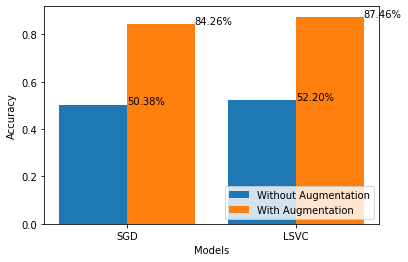

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

accSGD=0.5037878787878788
accSGDAug=0.8425544886450236
accLSVC=0.521969696969697
accLSVCAug=0.8745618046029568

# create data
x = np.arange(2)
y1 = [accSGD, accLSVC]
y2 = [accSGDAug, accLSVCAug]
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xticks([0,1],["SGD", "LSVC"])
plt.legend(['Without Augmentation','With Augmentation'],loc="lower right");
plt.annotate("{:.2%}".format(accSGD), (0, accSGD))
plt.annotate("{:.2%}".format(accSGDAug), (0.40, accSGDAug))
plt.annotate("{:.2%}".format(accLSVC), (1, accLSVC))
plt.annotate("{:.2%}".format(accLSVCAug), (1.40, accLSVCAug))
plt.ylabel('Accuracy')
plt.xlabel('Models')